In [1]:
import qiskit
import numpy as np
import matplotlib.pyplot as plt
import qtm.base_qtm, qtm.constant, qtm.qtm_nqubit, qtm.qtm_1qubit, qtm.custom_gate

<img src='others\general_w.png' width = 500px/>

<img src='others\general_w2.png' width = 500px/>

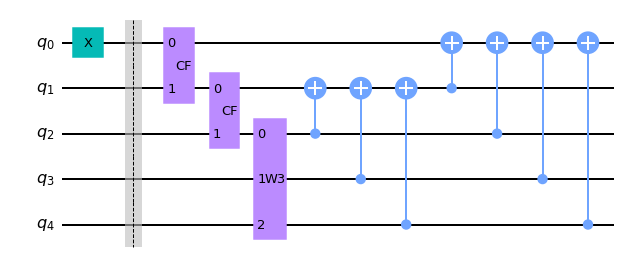

In [20]:
def w(qc: qiskit.QuantumCircuit, num_qubits: int, shift: int = 0):
    if num_qubits < 2:
        raise ValueError('W state must has at least 2-qubit')
    if num_qubits == 2:
        # |W> state ~ |+> state
        qc.h(0)
        return
    if num_qubits == 3:
        # Return the base function
        qc.w3(shift)
        return
    else:
        # Theta value of F gate base on the circuit that it acts on
        theta = np.arccos(1/np.sqrt(qc.num_qubits - shift))
        qc.cf(theta, shift, shift + 1)
        # Recursion until the number of qubit's equal 3
        w(qc, num_qubits - 1, qc.num_qubits - (num_qubits - 1))
        for i in range(1, num_qubits):
            qc.cnot(i + shift, shift)
    return qc

qc = qiskit.QuantumCircuit(5)
qc.x(0)
qc.barrier()
qc = w(qc, qc.num_qubits)
qc.draw('mpl')


In [22]:
qiskit.quantum_info.Statevector.from_instruction(qc)

Statevector([0.       +0.j, 0.4472136+0.j, 0.4472136+0.j, 0.       +0.j,
             0.4472136+0.j, 0.       +0.j, 0.       +0.j, 0.       +0.j,
             0.4472136+0.j, 0.       +0.j, 0.       +0.j, 0.       +0.j,
             0.       +0.j, 0.       +0.j, 0.       +0.j, 0.       +0.j,
             0.4472136+0.j, 0.       +0.j, 0.       +0.j, 0.       +0.j,
             0.       +0.j, 0.       +0.j, 0.       +0.j, 0.       +0.j,
             0.       +0.j, 0.       +0.j, 0.       +0.j, 0.       +0.j,
             0.       +0.j, 0.       +0.j, 0.       +0.j, 0.       +0.j],
            dims=(2, 2, 2, 2, 2))